<a href="https://colab.research.google.com/github/annmarie520/DATASCI112/blob/main/Formula_1_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import copy
from itertools import combinations
import csv

## Import Data

In [3]:
df_f1 = pd.read_csv('/content/f1_data_with_float.csv')
df_f1

,Unnamed: 0.1,Unnamed: 0,qualifyId,raceId,driverId,constructorId,number_car_number,position,q1,q2,...,track_temp_qualifying,wind_direction_qualifying,wind_speed_qualifying,rainfall_qualifying,fastest_lap,stop,fastest_lap_float,q1_float,q2_float,q3_float
0,0,0,8740.0,1052.0,817.0,1.0,3.0,6.0,1:30.795,1:30.222,...,33.84359,174.666667,0.966667,0.0,1:34.932,2.0,1.34932,1.30795,1.30222,1.29927
1,1,1,8736.0,1052.0,1.0,131.0,44.0,2.0,1:30.617,1:30.085,...,33.84359,174.666667,0.966667,0.0,1:34.015,2.0,1.34015,1.30617,1.30085,1.29385
2,2,2,8737.0,1052.0,822.0,131.0,77.0,3.0,1:31.200,1:30.186,...,33.84359,174.666667,0.966667,0.0,1:32.090,3.0,1.32090,1.31200,1.30186,1.29586
3,3,3,8750.0,1052.0,839.0,214.0,31.0,16.0,1:31.724,\N,...,33.84359,174.666667,0.966667,0.0,1:35.250,2.0,1.35250,1.31724,NaN,NaN
4,4,4,8743.0,1052.0,4.0,214.0,14.0,9.0,1:30.863,1:30.595,...,33.84359,174.666667,0.966667,0.0,1:36.063,2.0,1.36063,1.30863,1.30595,1.30249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,434,434,9169.0,1073.0,841.0,51.0,99.0,14.0,1:24.118,1:24.251,...,29.17284,297.024691,0.316049,0.0,1:29.442,1.0,1.29442,1.24118,1.24251,NaN
435,435,435,9167.0,1073.0,842.0,213.0,10.0,12.0,1:23.489,1:24.043,...,29.17284,297.024691,0.316049,0.0,1:27.342,2.0,1.27342,1.23489,1.24043,NaN
436,436,436,9163.0,1073.0,852.0,213.0,22.0,8.0,1:23.428,1:23.404,...,29.17284,297.024691,0.316049,0.0,1:27.496,2.0,1.27496,1.23428,1.23404,1.23220
437,437,437,9157.0,1073.0,1.0,131.0,44.0,2.0,1:22.845,1:23.145,...,29.17284,297.024691,0.316049,0.0,1:26.615,1.0,1.26615,1.22845,1.23145,1.22480


In [ ]:
df_f1.astype({"qualifyId": int, "raceId": int, "driverId": int, "constructorId": int, "number_car_number": int, "position": int, "year": int, "round": int})


In [5]:
train_idx = choice(len(df_f1), len(df_f1)//2, replace=False)
test_idx = np.delete(np.arange(len(df_f1)), train_idx)

In [6]:
df_train = df_f1.iloc[train_idx]
df_test = df_f1.iloc[test_idx]

## Variable Visualization

Filtered data to just driver Riccardo to better see trends in data

In [ ]:
driver=df_f1.loc[(df_f1['code'] == 'HAM')]
driver.sort_values('q1', ascending=True, inplace=True)
driver.astype({"qualifyId": int, "raceId": int, "driverId": int, "constructorId": int, "number_car_number": int, "position": int, "year": int, "round": int})

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


0.5737510828135581

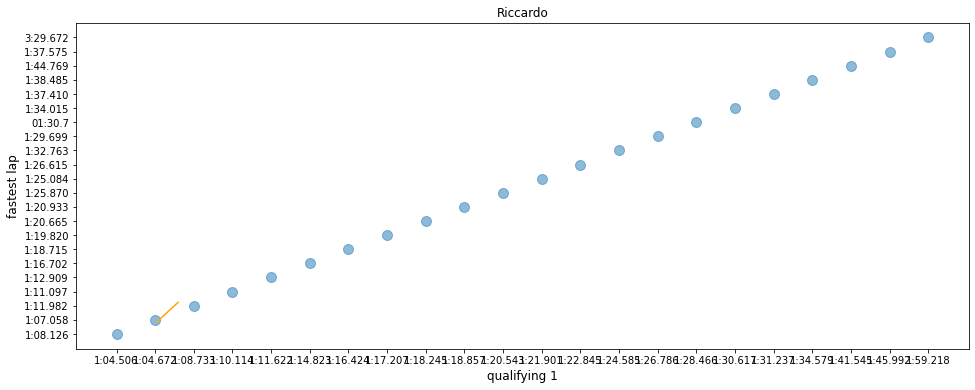

In [8]:
plt=driver.plot.scatter(x="q1", y="fastest_lap",alpha = .5, s=100, figsize=(16, 6), title = "Riccardo")
plt.set_xlabel("qualifying 1", fontsize = 12)
plt.set_ylabel("fastest lap", fontsize = 12)



x = driver["q1_float"]
y = driver["fastest_lap_float"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color = 'orange')

actual = driver["q1_float"]
predict = driver["fastest_lap_float"]
 
corr_matrix = np.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

0.2259231703784797

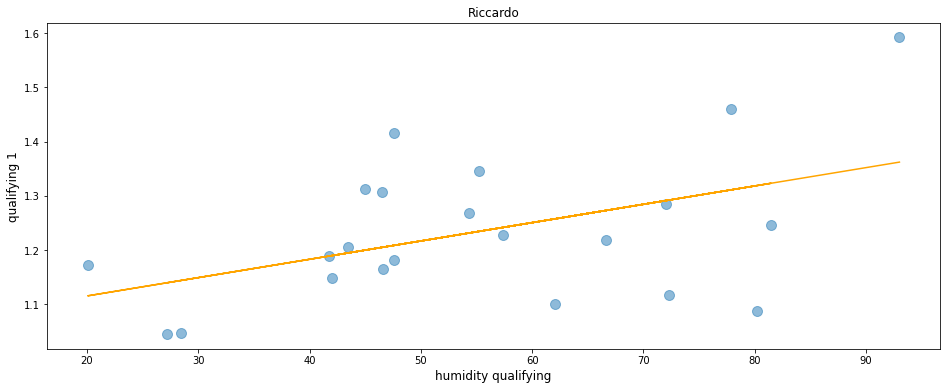

In [9]:
plt=driver.plot.scatter(x="humidity_qualifying", y="q1_float",alpha = .5, s=100, figsize=(16, 6), title = "Riccardo")
plt.set_xlabel("humidity qualifying", fontsize = 12)
plt.set_ylabel("qualifying 1", fontsize = 12)

x = driver["humidity_qualifying"]
y = driver["q1_float"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color = 'orange')

actual = driver["humidity_qualifying"]
predict = driver["q1_float"]
 
corr_matrix = np.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

0.2724456108518278

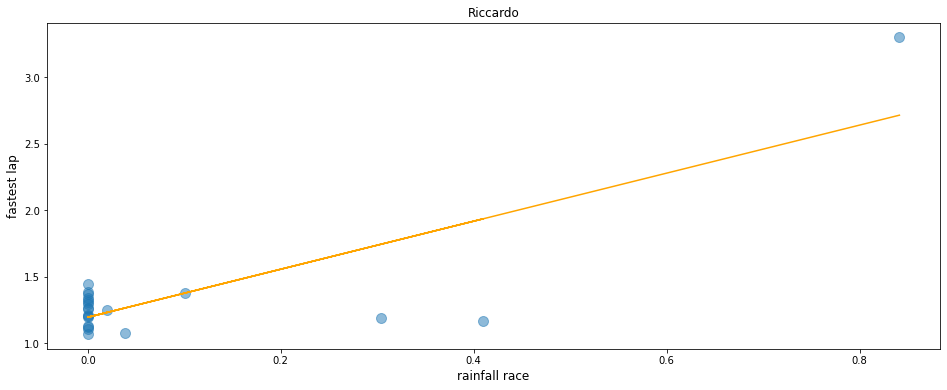

In [11]:
plt=driver.plot.scatter(x="rainfall_race", y="fastest_lap_float",alpha = .5, s=100, figsize=(16, 6), title = "Riccardo")
plt.set_xlabel("rainfall race", fontsize = 12)
plt.set_ylabel("fastest lap", fontsize = 12)

x = driver["rainfall_race"]
y = driver["fastest_lap_float"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color = 'orange')

actual = driver["humidity_race"]
predict = driver["fastest_lap_float"]
 
corr_matrix = np.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

0.2724456108518278

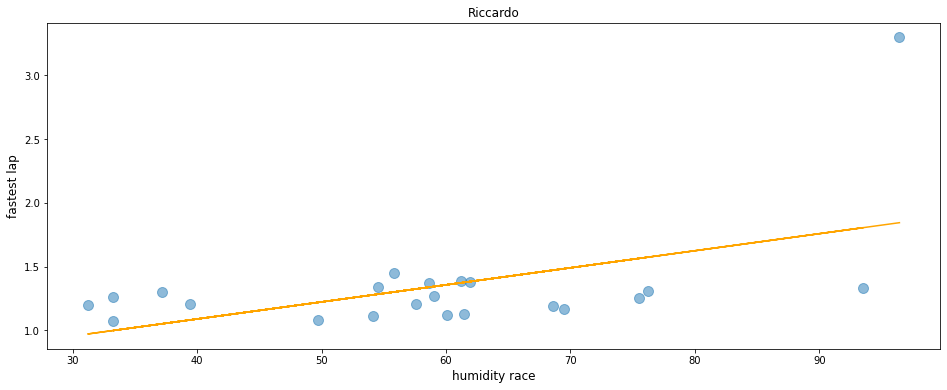

In [12]:
plt=driver.plot.scatter(x="humidity_race", y="fastest_lap_float",alpha = .5, s=100, figsize=(16, 6), title = "Riccardo")
plt.set_xlabel("humidity race", fontsize = 12)
plt.set_ylabel("fastest lap", fontsize = 12)

x = driver["humidity_race"]
y = driver["fastest_lap_float"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color = 'orange')

actual = driver["humidity_race"]
predict = driver["fastest_lap_float"]
 
corr_matrix = np.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

0.007742429711023775

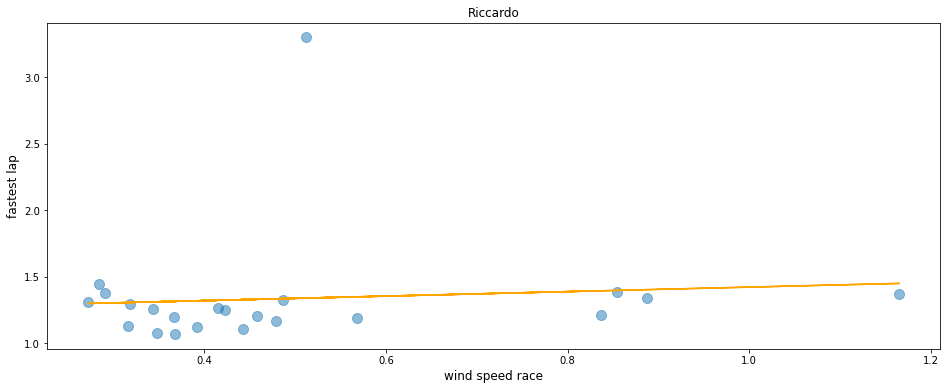

In [14]:
plt=driver.plot.scatter(x="wind_speed_race", y="fastest_lap_float",alpha = .5, s=100, figsize=(16, 6), title = "Riccardo")
plt.set_xlabel("wind speed race", fontsize = 12)
plt.set_ylabel("fastest lap", fontsize = 12)

x = driver["wind_speed_race"]
y = driver["fastest_lap_float"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color = 'orange')

actual = driver["wind_speed_race"]
predict = driver["fastest_lap_float"]
 
corr_matrix = np.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

0.26632031012306995

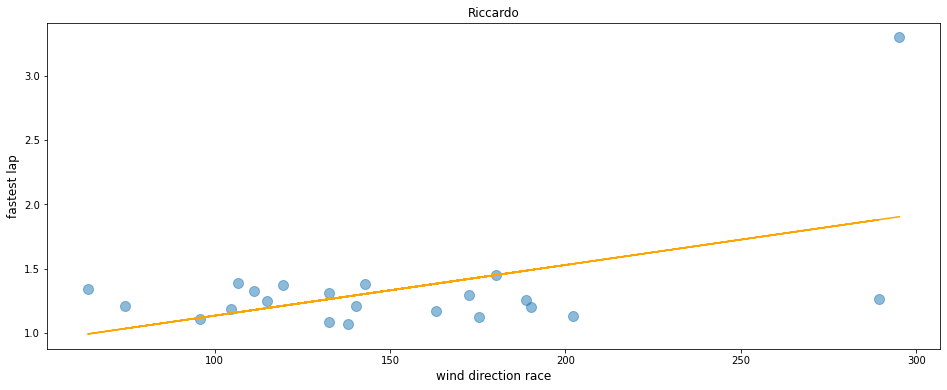

In [15]:
plt=driver.plot.scatter(x="wind_direction_race", y="fastest_lap_float",alpha = .5, s=100, figsize=(16, 6), title = "Riccardo")
plt.set_xlabel("wind direction race", fontsize = 12)
plt.set_ylabel("fastest lap", fontsize = 12)

x = driver["wind_direction_race"]
y = driver["fastest_lap_float"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color = 'orange')

actual = driver["wind_direction_race"]
predict = driver["fastest_lap_float"]
 
corr_matrix = np.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

0.1395982633355837

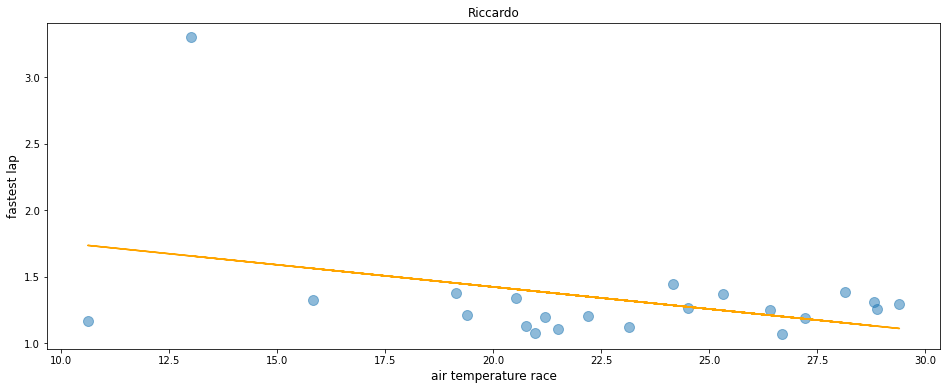

In [30]:
plt=driver.plot.scatter(x="air_temp_race", y="fastest_lap_float",alpha = .5, s=100, figsize=(16, 6), title = "Riccardo")
plt.set_xlabel("air temperature race", fontsize = 12)
plt.set_ylabel("fastest lap", fontsize = 12)

x = driver["air_temp_race"]
y = driver["fastest_lap_float"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color = 'orange')

actual = driver["air_temp_race"]
predict = driver["fastest_lap_float"]
 
corr_matrix = np.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

0.21235261575760686

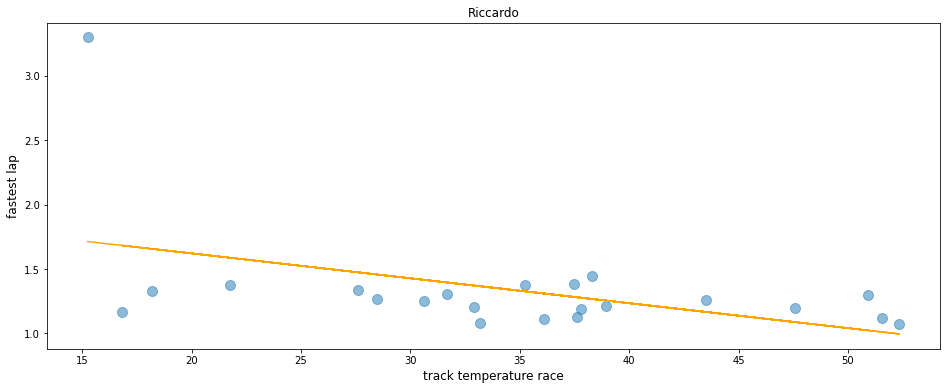

In [31]:
plt=driver.plot.scatter(x="track_temp_race", y="fastest_lap_float",alpha = .5, s=100, figsize=(16, 6), title = "Riccardo")
plt.set_xlabel("track temperature race", fontsize = 12)
plt.set_ylabel("fastest lap", fontsize = 12)

x = driver["track_temp_race"]
y = driver["fastest_lap_float"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color = 'orange')

actual = driver["track_temp_race"]
predict = driver["fastest_lap_float"]
 
corr_matrix = np.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

## Clustering Visuals

In [ ]:
spanish_gp=df_f1.loc[(df_f1['name_GP'] == 'Spanish Grand Prix')]
spanish_gp

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'team')

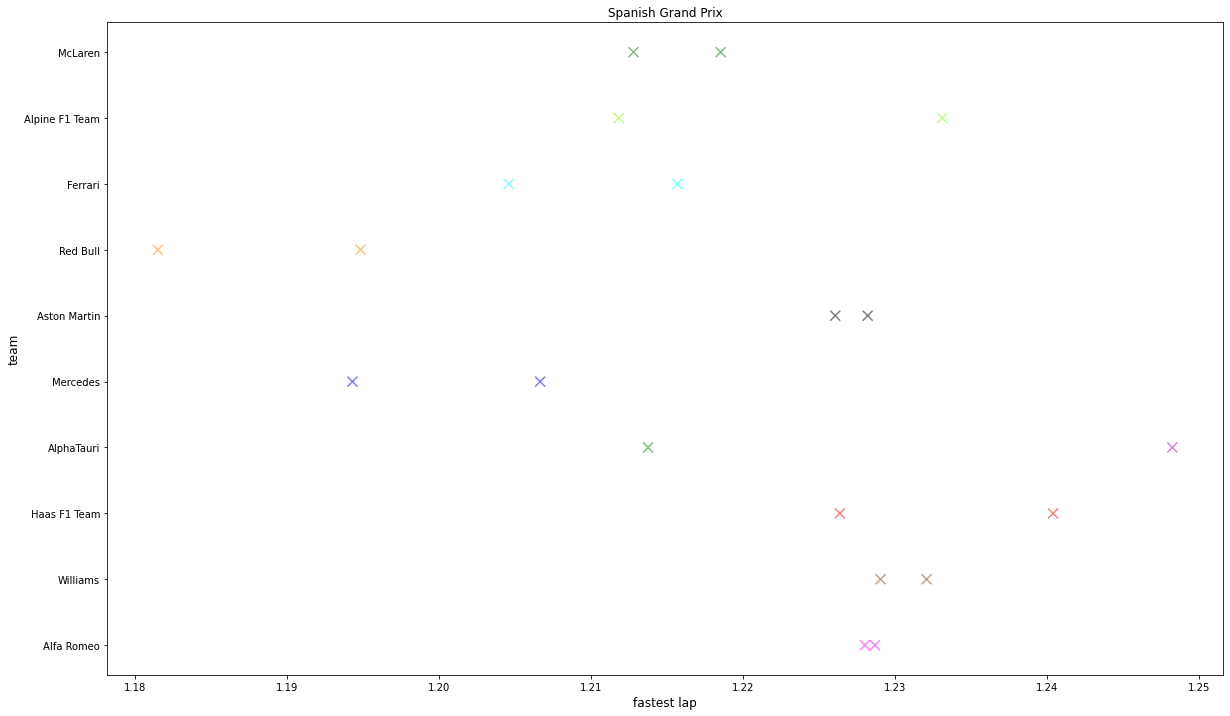

In [19]:
from sklearn.cluster import AgglomerativeClustering, KMeans
col_trans = make_column_transformer(
    (OneHotEncoder(sparse = False), ["name_team"]),
    (StandardScaler(), ["fastest_lap_float"]),
    remainder = "drop"
)

x_train = spanish_gp[["name_team","fastest_lap_float"]]


model = KMeans(n_clusters=10)
pipeline = make_pipeline(
    col_trans, model
)

pipeline.fit(x_train)
clusters = model.labels_
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "saddlebrown",
    3: "g",
    4: "m",
    5: "fuchsia",
    6: "k",
    7: "darkorange",
    8: "aqua",
    9: "lawngreen",

})

plt=x_train.plot.scatter(x="fastest_lap_float", y="name_team", c=clusters, marker = "x", alpha = .5, s=100, figsize=(20, 12), title = "Spanish Grand Prix")
plt.set_xlabel("fastest lap", fontsize = 12)
plt.set_ylabel("team", fontsize = 12)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'team')

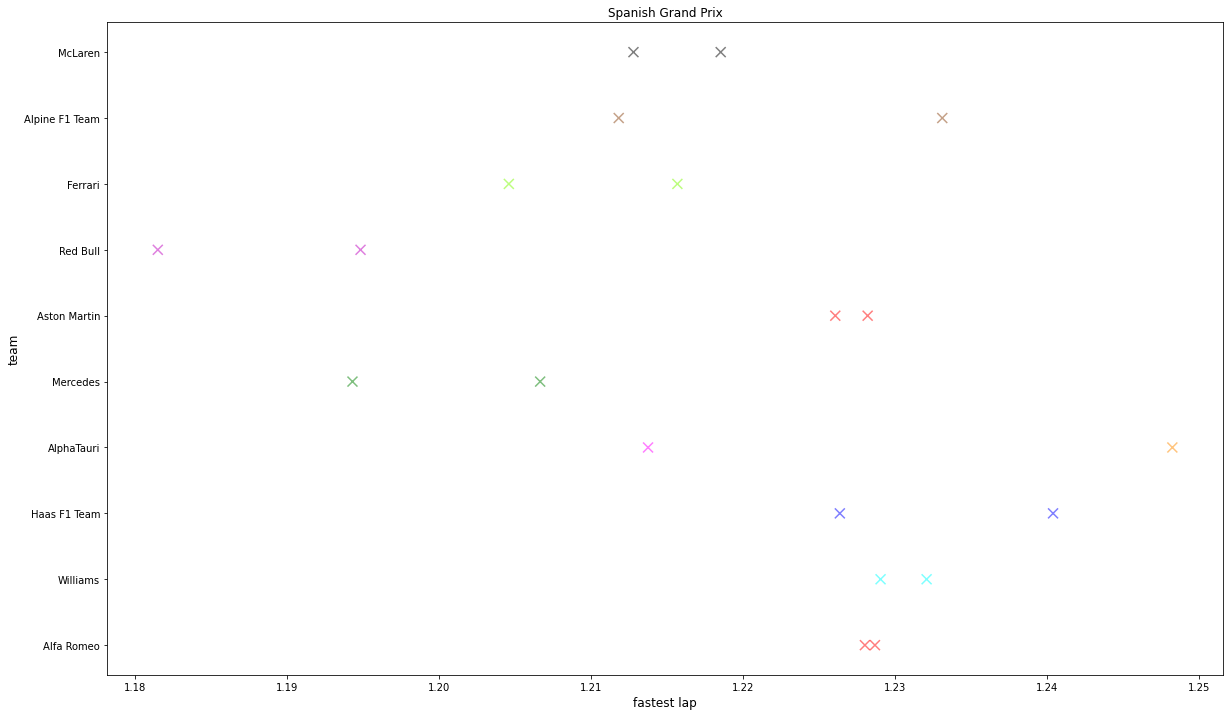

In [18]:
from sklearn.cluster import AgglomerativeClustering, KMeans
col_trans = make_column_transformer(
    (OneHotEncoder(sparse = False), ["name_team"]),
    (StandardScaler(), ["fastest_lap_float"]),
    remainder = "drop"
)

x_train = spanish_gp[["name_team","fastest_lap_float"]]


model = AgglomerativeClustering(n_clusters=10, linkage="single")
pipeline = make_pipeline(
    col_trans, model
)

pipeline.fit(x_train)
clusters = model.labels_
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "saddlebrown",
    3: "g",
    4: "m",
    5: "fuchsia",
    6: "k",
    7: "darkorange",
    8: "aqua",
    9: "lawngreen"

})

plt=x_train.plot.scatter(x="fastest_lap_float", y="name_team", c=clusters, marker = "x", alpha = .5, s=100, figsize=(20, 12), title = "Spanish Grand Prix")
plt.set_xlabel("fastest lap", fontsize = 12)
plt.set_ylabel("team", fontsize = 12)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'team')

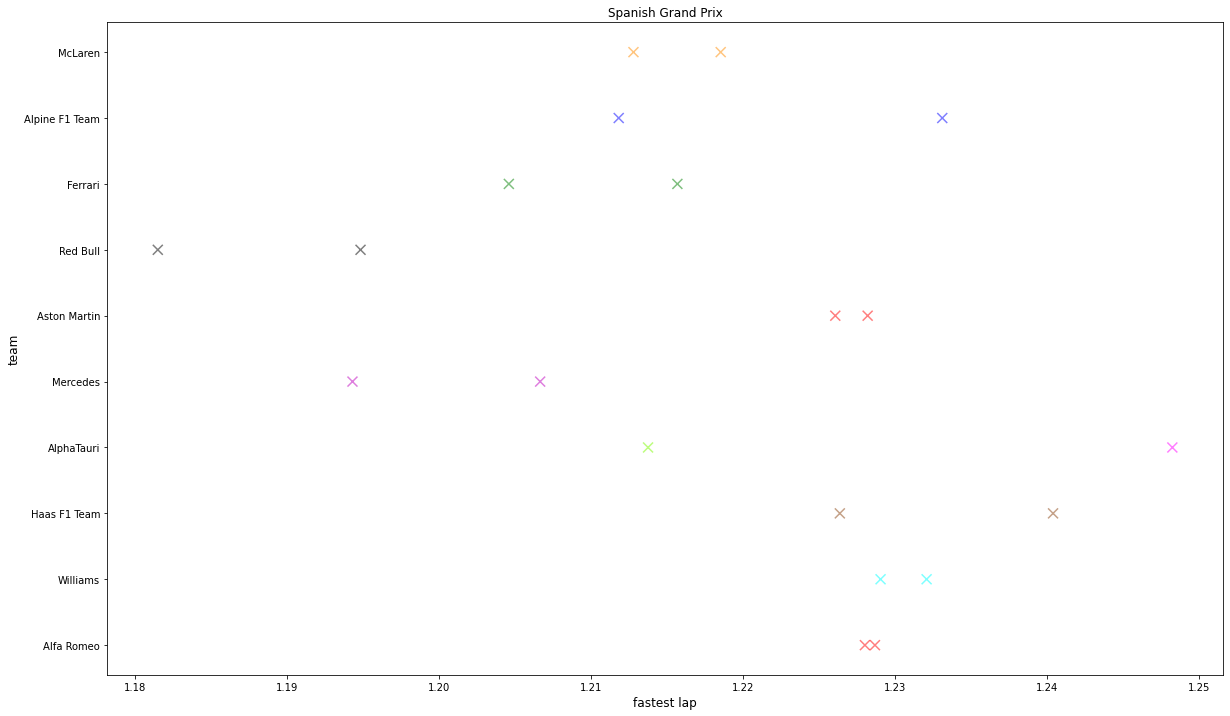

In [20]:
from sklearn.cluster import AgglomerativeClustering, KMeans
col_trans = make_column_transformer(
    (OneHotEncoder(sparse = False), ["name_team"]),
    (StandardScaler(), ["fastest_lap_float"]),
    remainder = "drop"
)

x_train = spanish_gp[["name_team","fastest_lap_float"]]


model = AgglomerativeClustering(n_clusters=10, linkage="complete")
pipeline = make_pipeline(
    col_trans, model
)

pipeline.fit(x_train)
clusters = model.labels_
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "saddlebrown",
    3: "g",
    4: "m",
    5: "fuchsia",
    6: "k",
    7: "darkorange",
    8: "aqua",
    9: "lawngreen",

})

plt=x_train.plot.scatter(x="fastest_lap_float", y="name_team", c=clusters, marker = "x", alpha = .5, s=100, figsize=(20, 12), title = "Spanish Grand Prix")
plt.set_xlabel("fastest lap", fontsize = 12)
plt.set_ylabel("team", fontsize = 12)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'team')

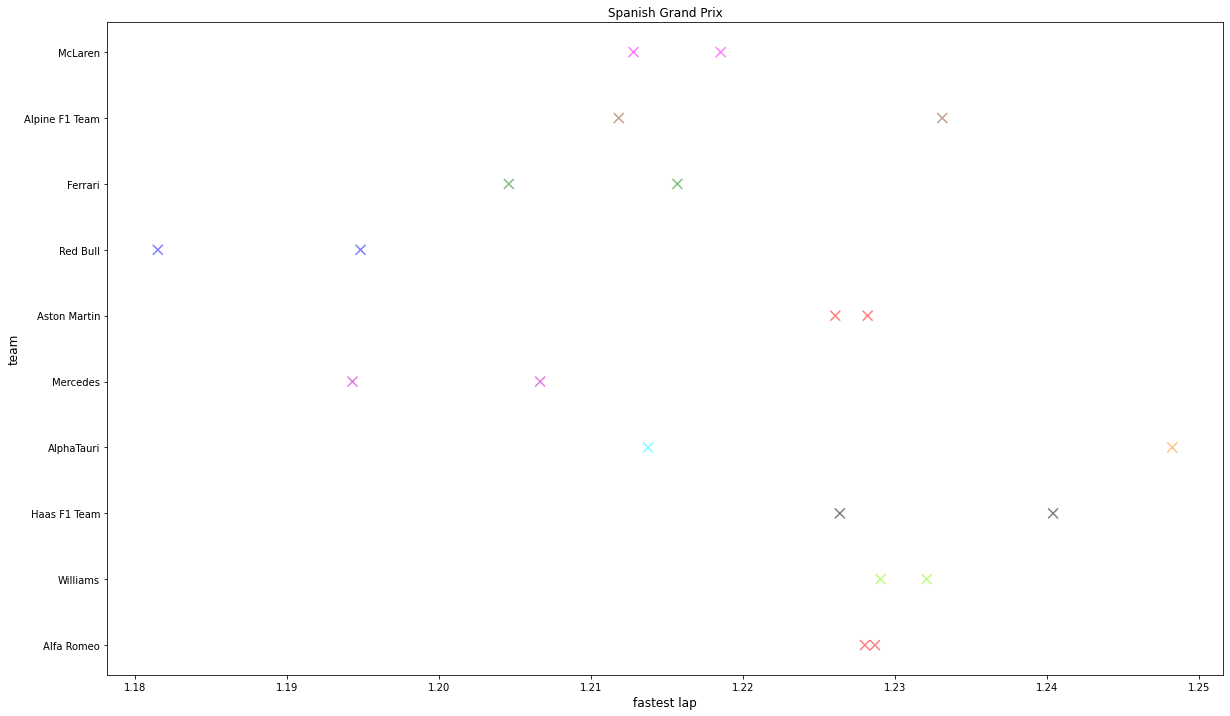

In [21]:
from sklearn.cluster import AgglomerativeClustering, KMeans
col_trans = make_column_transformer(
    (OneHotEncoder(sparse = False), ["name_team"]),
    (StandardScaler(), ["fastest_lap_float"]),
    remainder = "drop"
)

x_train = spanish_gp[["name_team","fastest_lap_float"]]


model = AgglomerativeClustering(n_clusters=10, linkage="average")
pipeline = make_pipeline(
    col_trans, model
)

pipeline.fit(x_train)
clusters = model.labels_
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "saddlebrown",
    3: "g",
    4: "m",
    5: "fuchsia",
    6: "k",
    7: "darkorange",
    8: "aqua",
    9: "lawngreen",

})

plt=x_train.plot.scatter(x="fastest_lap_float", y="name_team", c=clusters, marker = "x", alpha = .5, s=100, figsize=(20, 12), title = "Spanish Grand Prix")
plt.set_xlabel("fastest lap", fontsize = 12)
plt.set_ylabel("team", fontsize = 12)

AgglomerativeClustering was better than Kmeans. All of the linkages for AgglomerativeClustering looked the same so I will use "complete" for my next models

In [23]:
abu_gp=df_f1.loc[(df_f1['name_GP'] == 'Spanish Grand Prix')]

In [25]:
df_f1 = pd.read_csv('/content/f1_data_with_float.csv')
df_f1.astype({"qualifyId": int, "raceId": int, "driverId": int, "constructorId": int, "number_car_number": int, "position": int, "year": int, "round": int})

abu_gp=df_f1.loc[(df_f1['name_GP'] == 'Abu Dhabi Grand Prix')].drop([432])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'team')

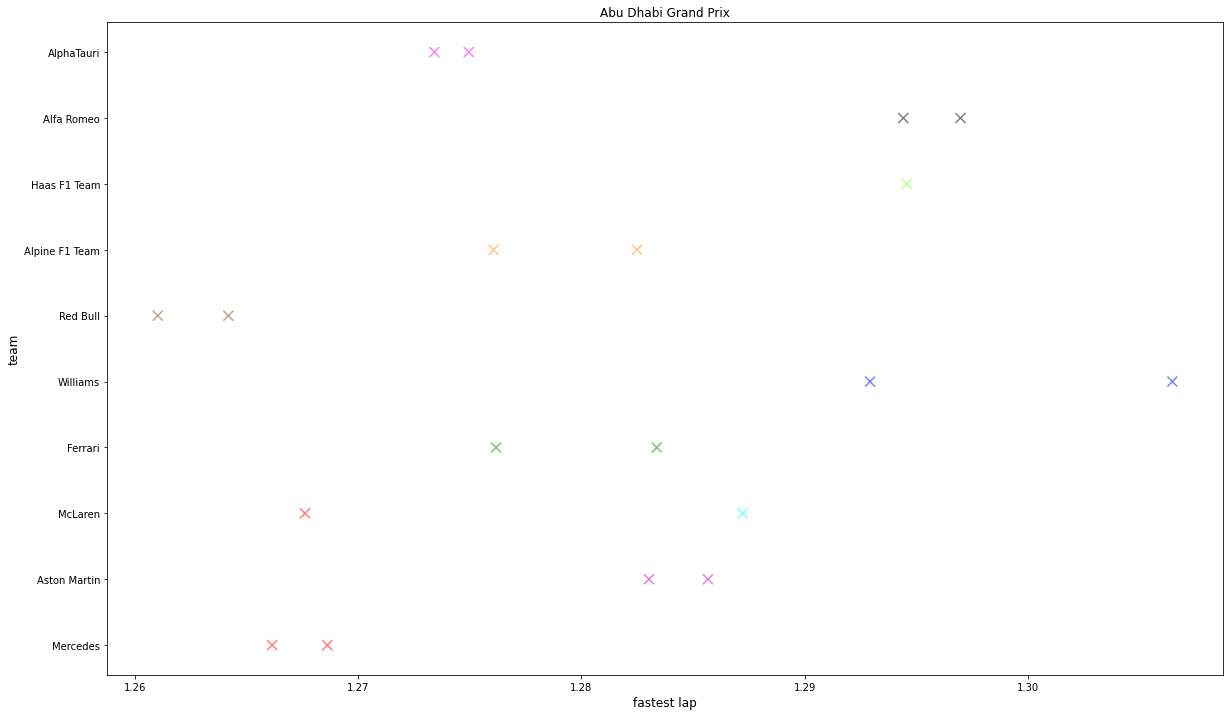

In [26]:
from sklearn.cluster import AgglomerativeClustering, KMeans
col_trans = make_column_transformer(
    (OneHotEncoder(sparse = False), ["name_team"]),
    (StandardScaler(), ["fastest_lap_float"]),
    remainder = "drop"
)

x_train = abu_gp[["name_team","fastest_lap_float"]]

model = AgglomerativeClustering(n_clusters=10, linkage="complete")
pipeline = make_pipeline(
    col_trans, model
)

pipeline.fit(x_train)
clusters = model.labels_
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "saddlebrown",
    3: "g",
    4: "m",
    5: "fuchsia",
    6: "k",
    7: "darkorange",
    8: "aqua",
    9: "lawngreen",

})

plt=x_train.plot.scatter(x="fastest_lap_float", y="name_team", c=clusters, marker = "x", alpha = .5, s=100, figsize=(20, 12), title = "Abu Dhabi Grand Prix")
plt.set_xlabel("fastest lap", fontsize = 12)
plt.set_ylabel("team", fontsize = 12)

In [27]:
df_f1 = pd.read_csv('/content/f1_data_with_float.csv')
df_f1.astype({"qualifyId": int, "raceId": int, "driverId": int, "constructorId": int, "number_car_number": int, "position": int, "year": int, "round": int})

monaco_gp=df_f1.loc[(df_f1['name_GP'] == 'Monaco Grand Prix')].drop([84])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'team')

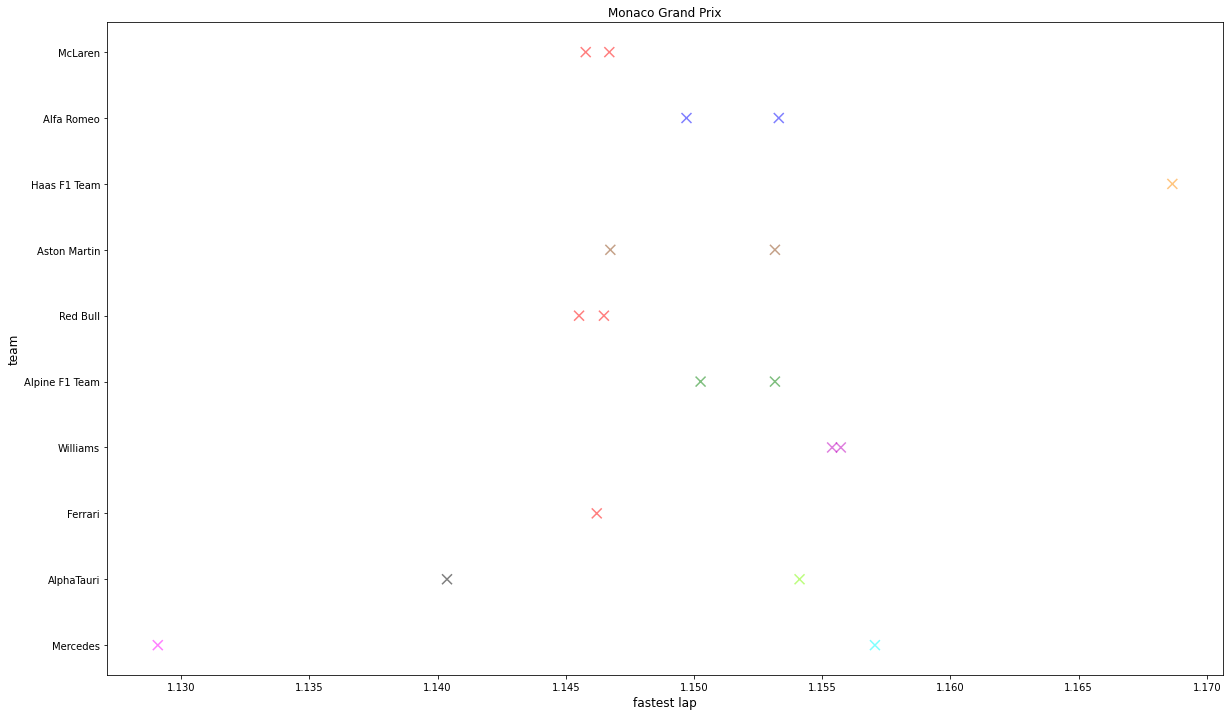

In [28]:
from sklearn.cluster import AgglomerativeClustering, KMeans
col_trans = make_column_transformer(
    (OneHotEncoder(sparse = False), ["name_team"]),
    (StandardScaler(), ["fastest_lap_float"]),
    remainder = "drop"
)

x_train = monaco_gp[["name_team","fastest_lap_float"]]


model = AgglomerativeClustering(n_clusters=10, linkage="complete")
pipeline = make_pipeline(
    col_trans, model
)

pipeline.fit(x_train)
clusters = model.labels_
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "saddlebrown",
    3: "g",
    4: "m",
    5: "fuchsia",
    6: "k",
    7: "darkorange",
    8: "aqua",
    9: "lawngreen",

})

plt=x_train.plot.scatter(x="fastest_lap_float", y="name_team", c=clusters, marker = "x", alpha = .5, s=100, figsize=(20, 12), title = "Monaco Grand Prix")
plt.set_xlabel("fastest lap", fontsize = 12)
plt.set_ylabel("team", fontsize = 12)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'grand prix')

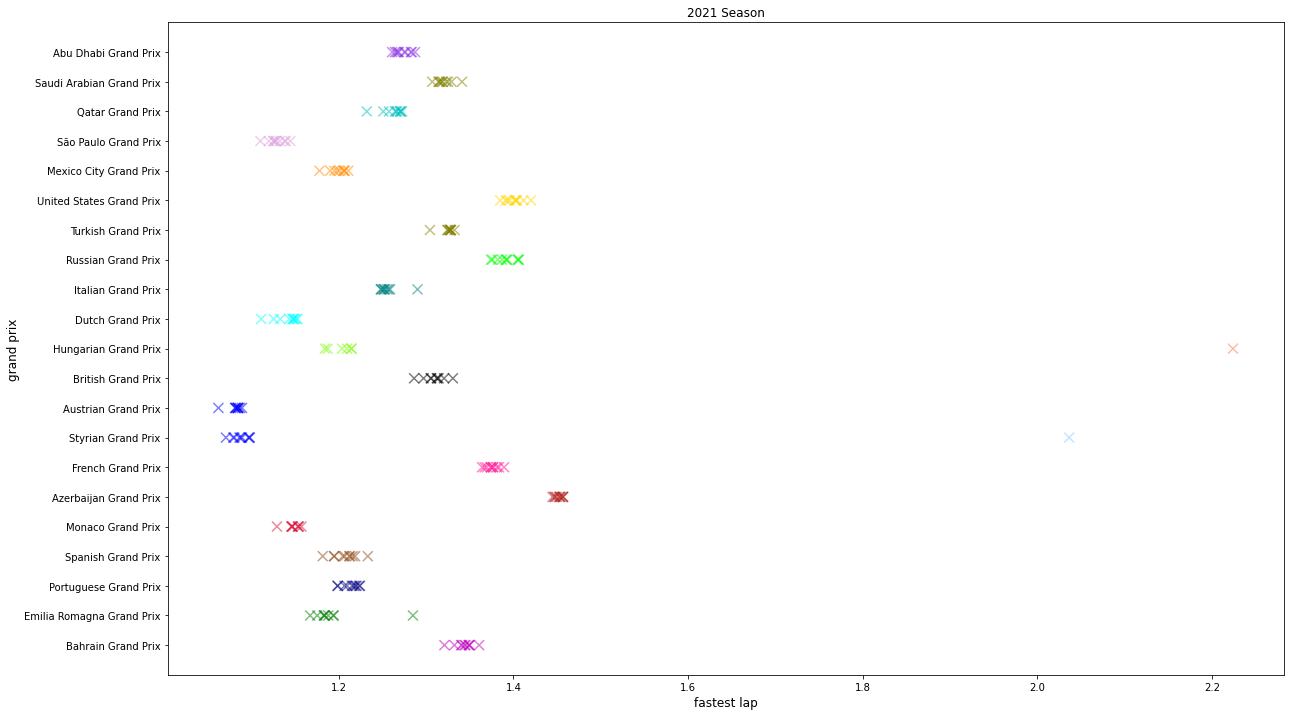

In [29]:
df_f1 = df_f1.dropna()

from sklearn.cluster import AgglomerativeClustering, KMeans
col_trans = make_column_transformer(
    (OneHotEncoder(sparse = False,handle_unknown="ignore"), ["name_GP"]),
    (StandardScaler(), ["fastest_lap_float"]),
    remainder = "drop"
)

x_train = df_f1[["name_GP","fastest_lap_float"]]

model = AgglomerativeClustering(n_clusters=21, linkage="complete")
pipeline = make_pipeline(
    col_trans, model
)

pipeline.fit(x_train)
clusters = model.labels_
clusters = pd.Series(clusters).map({
    0: "olive",
    1: "b",
    2: "saddlebrown",
    3: "g",
    4: "m",
    5: "c",
    6: "k",
    7: "darkorange",
    8: "aqua",
    9: "lawngreen",
    10: "firebrick",
    11: "coral",
    12: "gold",
    13: "lime",
    14: "teal",
    15: "crimson",
    16: "navy",
    17: "plum",
    18: "deeppink",
    19: "lightskyblue",
    20: "blueviolet",

})

plt=x_train.plot.scatter(x="fastest_lap_float", y="name_GP", c=clusters, marker = "x", alpha = .5, s=100, figsize=(20, 12), title = "2021 Season")
plt.set_xlabel("fastest lap", fontsize = 12)
plt.set_ylabel("grand prix", fontsize = 12)